<a href="https://colab.research.google.com/github/julichitai/learning_NN/blob/MIPT/pytorch_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py

In [ ]:
# ================================================================== #
#                         Neural Network                             #
# ================================================================== #

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 32 * 32 * 3
hidden_size = 500
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_epochs = 10

# MNIST dataset 
train_dataset = torchvision.datasets.CIFAR10('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10('./data',
                                          train=False,
                                          transform=transforms.ToTensor())
# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_steps = len(train_loader)
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. Step [{i + 1}/{total_steps}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    total = 0
    correct = 0
    mean_loss = 0
    total_test_size = len(test_loader)
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()
    
    print(f'Accuracy on {batch_size * total_test_size} test images is {round(float(correct / total * 100), 2)}', end=' ')
    print(f'Loss {mean_loss / total_test_size}')

# Save the model checkpoint
torch.save(model, 'model.pth')

Files already downloaded and verified
Epoch [1/10]. Step [100/500]. Loss 1.7612755298614502. Accuracy 24.83
Epoch [1/10]. Step [200/500]. Loss 1.8539156913757324. Accuracy 28.81
Epoch [1/10]. Step [300/500]. Loss 1.9151349067687988. Accuracy 30.35
Epoch [1/10]. Step [400/500]. Loss 1.5922702550888062. Accuracy 31.85
Epoch [1/10]. Step [500/500]. Loss 1.7429412603378296. Accuracy 32.76
Epoch [2/10]. Step [100/500]. Loss 1.7222720384597778. Accuracy 37.68
Epoch [2/10]. Step [200/500]. Loss 1.7412655353546143. Accuracy 39.19
Epoch [2/10]. Step [300/500]. Loss 1.8095102310180664. Accuracy 39.22
Epoch [2/10]. Step [400/500]. Loss 1.7013442516326904. Accuracy 39.46
Epoch [2/10]. Step [500/500]. Loss 1.5171008110046387. Accuracy 39.87
Epoch [3/10]. Step [100/500]. Loss 1.8305286169052124. Accuracy 42.44
Epoch [3/10]. Step [200/500]. Loss 1.5850419998168945. Accuracy 42.17
Epoch [3/10]. Step [300/500]. Loss 1.5180033445358276. Accuracy 42.13
Epoch [3/10]. Step [400/500]. Loss 1.475077033042907

In [ ]:
model = torch.load('model.pth')

(tensor([0]), 6)

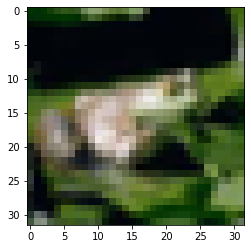

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


idx = np.random.randint(0, len(test_loader))
test_img  = test_dataset.data[idx]
plt.imshow(test_img)
output = model(torch.from_numpy(test_img.reshape(-1, input_size)).type(torch.float32))
_, pred = torch.max(output, dim=1)
pred, test_dataset.targets[idx]

tensor([8]) 8


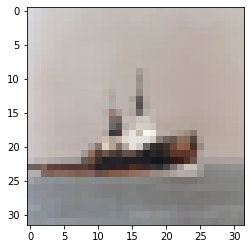

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


for imgs, labels in test_loader:
    idx = np.random.randint(0, test_loader.batch_size)
    img = imgs[idx]
    plt.imshow(np.rollaxis(img.numpy(), 0, 3))
    output = model(img.reshape(-1, input_size).type(torch.float32))
    _, pred = torch.max(output, dim=1)
    print(pred, test_dataset.targets[idx])
    break

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py

In [53]:
# ================================================================== #
#                   Convolutional Neural Network                     #
# ================================================================== #

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
input_size = 32 * 32
num_classes = 10
batch_size = 100
num_epochs = 10
learning_rate = 0.001

# dataset
train_dataset = torchvision.datasets.CIFAR10('./data',
                                            train=True,
                                            transform=transforms.ToTensor(),
                                            download=True)

test_dataset = torchvision.datasets.CIFAR10('./data',
                                           train=False,
                                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc1 = nn.Linear(64 * 5 * 5, output_size)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        return out


model = ConvNet(input_size, num_classes).to(device)

print(summary(model, (3, 32, 32), batch_size=2))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, dim=1)
        total = labels.size(0)
        correct = (predicted == labels).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. Step [{i + 1}/{total_step}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}')

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    total = 0
    correct = 0
    mean_loss = 0
    test_step = len(test_loader)
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print(f'Accuracy on {batch_size * test_step} test images is {round(float(correct / total * 100), 2)}')
    print(f'Mean loss {mean_loss / test_step}')

# Save the model checkpoint
torch.save(model, 'model.pth')

Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [2, 16, 28, 28]           1,216
       BatchNorm2d-2            [2, 16, 28, 28]              32
              ReLU-3            [2, 16, 28, 28]               0
         MaxPool2d-4            [2, 16, 14, 14]               0
            Conv2d-5            [2, 64, 10, 10]          25,664
       BatchNorm2d-6            [2, 64, 10, 10]             128
              ReLU-7            [2, 64, 10, 10]               0
         MaxPool2d-8              [2, 64, 5, 5]               0
            Linear-9                    [2, 10]          16,010
Total params: 43,050
Trainable params: 43,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.94
Params size (MB): 0.16
Estimated Total Size (MB): 1.13
-------

In [56]:
model = torch.load('model.pth')

[1] 1


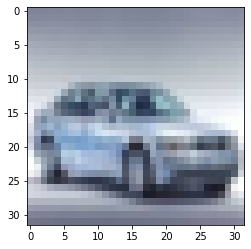

In [57]:
import matplotlib.pyplot as plt
import numpy as np


idx = np.random.randint(0, len(test_dataset))
img = test_dataset.data[idx]
plt.imshow(img)
img = torch.from_numpy(np.rollaxis(img, 2, 0)).type(torch.float32).to(device)

output = model(img[None])
_, pred = torch.max(output.data, dim=1)

print(pred.cpu().numpy(), test_dataset.targets[idx])

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/deep_residual_network/main.py

In [ ]:
# ================================================================== #
#                       Deep Residual Network                        #
# ================================================================== #
